### Import relevant packages 

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import data

In [2]:
BASE_DIR = Path("..") / "data" / "output"

df_empirica_regio = pd.read_csv(
    BASE_DIR / "empirica_regio_data.csv",
    encoding="utf-8-sig",
)
df_empirica_regio["Jahr"] = df_empirica_regio["Jahr"].astype(int)

df_macroeconomic = pd.read_csv(
    BASE_DIR / "macroeconomic_data.csv", 
    encoding="utf-8-sig",
)
df_macroeconomic["Jahr"] = df_macroeconomic["Jahr"].astype(int)

In [3]:
df_macroeconomic

,Datum,Jahr,Monat,Effektiver Jahreszins,S&P500 Return,10YGerman Bond Return,Inflation,Einlagefazilität,Hauptrefinanzierungsgeschäft,ifo Geschäftserwartung (Deutschland),ifo Geschäftsklima (Deutschland),ifo Geschäftsklima (Vearbeitendes Gewerbe),ifo Geschäftsklima (Bauhauptgewerbe),CCI,10 Jahre Sollzinsbindung,15 Jahre Sollzinsbindung
0,2003-01-01,2003,1,5.39,-2.74,4.0580,1.0,1.75,2.75,NaN,NaN,-11.0,-48.1,-23.2,NaN,NaN
1,2003-02-01,2003,2,5.18,-1.71,3.8960,1.3,1.75,2.75,NaN,NaN,-9.2,-47.6,-24.5,NaN,NaN
2,2003-03-01,2003,3,5.07,0.84,4.0330,1.0,1.75,2.75,NaN,NaN,-11.1,-45.7,-23.4,NaN,NaN
3,2003-04-01,2003,4,5.04,8.10,4.0650,0.9,1.50,2.50,NaN,NaN,-10.7,-44.9,-21.7,NaN,NaN
4,2003-05-01,2003,5,4.97,5.09,3.6750,0.5,1.50,2.50,NaN,NaN,-11.2,-45.1,-20.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2025-05-01,2025,5,3.70,6.15,2.5090,2.1,2.25,2.40,-13.6,-8.8,-14.2,-18.1,-8.7,3.56,3.69
269,2025-06-01,2025,6,3.72,4.96,2.5970,2.0,2.25,2.40,-10.3,-7.0,-14.2,-15.2,-8.8,3.57,3.70
270,2025-07-01,2025,7,3.72,2.17,2.6930,2.0,2.00,2.15,-9.7,-6.4,-12.1,-14.4,-8.4,3.57,3.69
271,2025-08-01,2025,8,3.76,1.91,2.7222,2.2,2.00,2.15,-8.4,-5.8,-12.5,-15.7,-10.6,3.64,3.82


### Markdown

In [108]:
df_deutschland_median = df_empirica_regio[df_empirica_regio["Regionsebene"] == "Gemeinde"]
df_deutschland_median = df_empirica_regio[df_empirica_regio["Jahr"] >= 2020]
#df_deutschland_median = df_deutschland_median[df_deutschland_median["Kaufpreis/m2 ETW 50%"] < 500]
df_deutschland_median = (
    df_deutschland_median
    .groupby("Jahr", as_index=False)
    .agg(
        kaufpreis_median=("Kaufpreis/m2 ETW 50%", "median"),
        mietpreis_median=("Mietpreis/m2 50%", "median"),
    )
    .sort_values("Jahr")
)
df_speicher = (
    df_macroeconomic
    .groupby("Jahr", as_index=False)
    .agg(
        effjahr_zins_median=("Effektiver Jahreszins", "median")
    )
    .sort_values("Jahr")
)
df_deutschland_median = df_deutschland_median.merge(df_speicher[["Jahr", "effjahr_zins_median"]], on="Jahr", how="left")

In [109]:
df_deutschland_median["mietpreis_median"] = df_deutschland_median["mietpreis_median"]*12
df_deutschland_median["kaufpreis_median"] = df_deutschland_median["kaufpreis_median"] * (df_deutschland_median["effjahr_zins_median"] + 2)/100
df_deutschland_median

,Jahr,kaufpreis_median,mietpreis_median,effjahr_zins_median
0,2020,94.44375,84.00,1.285
1,2021,105.52280,89.16,1.310
2,2022,159.23805,96.00,2.735
3,2023,195.81000,100.92,4.100
4,2024,187.00750,105.84,3.890


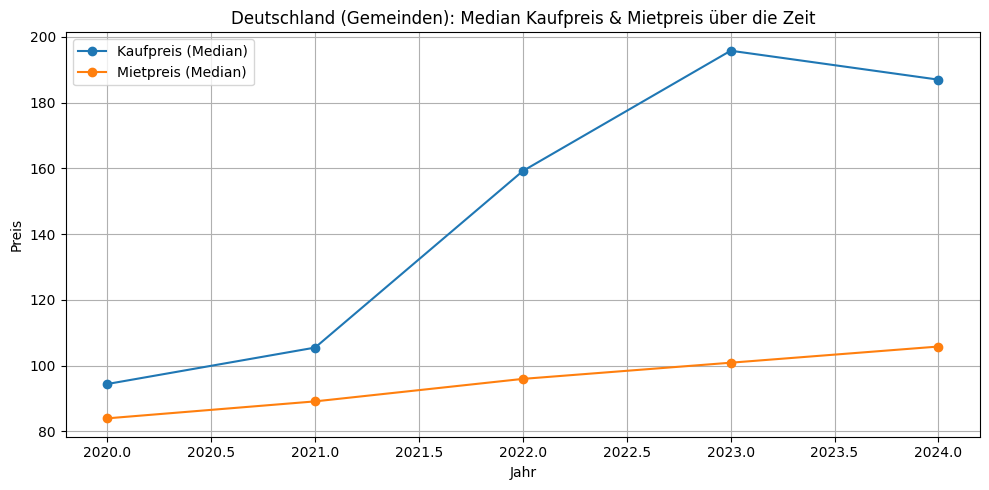

In [110]:
plt.figure(figsize=(10, 5))
plt.plot(df_deutschland_median["Jahr"], df_deutschland_median["kaufpreis_median"], marker="o", label="Kaufpreis (Median)")
plt.plot(df_deutschland_median["Jahr"], df_deutschland_median["mietpreis_median"], marker="o", label="Mietpreis (Median)")
plt.title("Deutschland (Gemeinden): Median Kaufpreis & Mietpreis über die Zeit")
plt.xlabel("Jahr")
plt.ylabel("Preis")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()